# IoT·인공지능·빅데이터 개론 및 실습 <br> 9/8 Logistic Regerssion & Neural Network with Scikit-Learn
---
Review by Kiyoung Kwon

From the scikit-learn tutorial **["An introduction to machine learning with scikit-learn"](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)**

## 1. Loading an example dataset & Preprocessing

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
##################################################
# Data shape & statistics
##################################################
print("Data: ", data['data'].shape)
print("Label: ", data['target'].shape)

# Just printing
print(data.data)
print(data.target)

Data:  (1797, 64)
Label:  (1797,)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [ ]:
# Print the number of samples for each class
import numpy as np

print(np.unique(data.target))

print(np.sum(data.target == 0))

for c in range(10):
  is_in_this_class = data['target'] == c
  count = np.sum(is_in_this_class)
  print("In class %d, %d" % (c, count))

##################################################

[0 1 2 3 4 5 6 7 8 9]
178
In class 0, 178
In class 1, 182
In class 2, 177
In class 3, 183
In class 4, 181
In class 5, 182
In class 6, 181
In class 7, 179
In class 8, 174
In class 9, 180


In [ ]:
# However the original sample, which is an "IMAGE" has a different shape
print(data.images[0])
print(data.images.shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 8, 8)


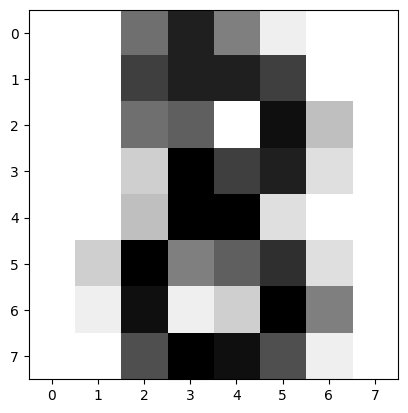

In [ ]:
##################################################
# Data Visualization
##################################################
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data['data'][8].reshape(8, 8), cmap=plt.cm.gray_r)
plt.show()

In [ ]:
##################################################
# 1st preprocessing
# Use the first 20 samples in each class as test data
# Use the others as training data
##################################################

train_data = []
test_data = []

train_target = []
test_target = []

# Filling in the empty list of data & targets
N = len(data.data)

for c in range(10):
  is_in_this_class = data.target == c       # boolean (1797, )

  # Masking
  data_in_this_class = data.data[is_in_this_class]
  target_in_this_class = data.target[is_in_this_class]

  test_data.append(data_in_this_class[:20])
  train_data.append(data_in_this_class[20:])
  test_target.append(target_in_this_class[:20])
  train_target.append(target_in_this_class[20:])

test_data = np.concatenate(test_data)
train_data = np.concatenate(train_data)
test_target = np.concatenate(test_target)
train_target = np.concatenate(train_target)

# Check the shape (result of preprocessing)
print(test_data.shape)
print(train_data.shape)

(200, 64)
(1597, 64)


In [ ]:
##################################################
# 2nd preprocessing
##################################################

train_data23 = []
test_data23 = []

train_target23 = []
test_target23 = []

# Filling in the empty list of data & targets
N = len(data.data)

for c in [2, 3]:
  is_in_this_class = data.target == c       # boolean (1797, )

  # Masking
  data_in_this_class = data.data[is_in_this_class]
  target_in_this_class = data.target[is_in_this_class]

  test_data23.append(data_in_this_class[:20])
  train_data23.append(data_in_this_class[20:])
  test_target23.append(target_in_this_class[:20])
  train_target23.append(target_in_this_class[20:])

test_data23 = np.concatenate(test_data23)
train_data23 = np.concatenate(train_data23)
test_target23 = np.concatenate(test_target23)
train_target23 = np.concatenate(train_target23)

# Check the shape (result of preprocessing)
print(test_data23.shape)
print(train_data23.shape)

(40, 64)
(320, 64)


## 2. Logistic regression & neural network models in scikit-learn
----
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag')
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1000)

## 3. Model training & prediction & evaluation

In [ ]:
##################################################
# Logistic regression model
##################################################
# Training
LR = LogisticRegression(max_iter=1000)
LR.fit(train_data23, train_target23)

# Prediction
train_predict23 = LR.predict(train_data23)
train_prob23 = LR.predict_proba(train_data23)
test_predict23 = LR.predict(test_data23)
test_prob23 = LR.predict_proba(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)
print("train_prob :", train_prob23[:10])
print("test_prob :", test_prob23[:10])


# Accuracy
is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)

print("train_acc :", train_acc23)
print("test_acc :", test_acc23)

test_target     : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
test_prediction : [2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
train_prob : [[9.98553147e-01 1.44685281e-03]
 [9.99990287e-01 9.71300635e-06]
 [9.99998794e-01 1.20640313e-06]
 [9.99999994e-01 5.94405183e-09]
 [9.99999681e-01 3.19351937e-07]
 [9.99772451e-01 2.27549362e-04]
 [9.99978438e-01 2.15622738e-05]
 [9.99999467e-01 5.33433798e-07]
 [9.99988782e-01 1.12176940e-05]
 [9.99781408e-01 2.18592129e-04]]
test_prob : [[9.94357159e-01 5.64284069e-03]
 [9.99964312e-01 3.56882311e-05]
 [9.99999359e-01 6.41363324e-07]
 [9.94468662e-01 5.53133823e-03]
 [9.99520780e-01 4.79219886e-04]
 [5.19309958e-01 4.80690042e-01]
 [9.36700608e-01 6.32993921e-02]
 [9.90454592e-01 9.54540824e-03]
 [4.88934623e-02 9.51106538e-01]
 [9.99999877e-01 1.23232879e-07]]
train_acc : 1.0
test_acc : 0.975


In [ ]:
##################################################
# Neural Network Model
##################################################

# Training
NN = MLPClassifier(hidden_layer_sizes=(10,),
                   activation='tanh',
                   learning_rate_init=1e-2,
                   max_iter=100)
NN.fit(train_data23, train_target23)

# Prediction
train_predict23 = NN.predict(train_data23)
train_prob23 = NN.predict_proba(train_data23)
test_predict23 = NN.predict(test_data23)
test_prob23 = NN.predict_proba(test_data23)
print("test_target      :", test_target23)
print("test_prediction  :", test_target23)
print("train_prob :", train_prob23[:10])
print("test_prob :", test_prob23[:10])

# Accuracy
is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)

print("train_acc :", train_acc23)
print("test_acc :", test_acc23)

test_target      : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
test_prediction  : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
train_prob : [[0.99547795 0.00452205]
 [0.99558517 0.00441483]
 [0.99558521 0.00441479]
 [0.99558521 0.00441479]
 [0.99558515 0.00441485]
 [0.99557308 0.00442692]
 [0.99558521 0.00441479]
 [0.99558521 0.00441479]
 [0.99558215 0.00441785]
 [0.99557583 0.00442417]]
test_prob : [[0.99527091 0.00472909]
 [0.99558521 0.00441479]
 [0.99558521 0.00441479]
 [0.99557549 0.00442451]
 [0.99549628 0.00450372]
 [0.85089736 0.14910264]
 [0.98998647 0.01001353]
 [0.97285275 0.02714725]
 [0.41544569 0.58455431]
 [0.99558521 0.00441479]]
train_acc : 1.0
test_acc : 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. Model save & load

In [ ]:
# from sklearn.externals import joblib
import joblib
import os

if not os.path.exists('models'):
  os.makedirs('models')

# save
joblib.dump(NN, 'models/NN23.joblib')

# load
NN_load = joblib.load('models/NN23.joblib')

# Predict using the saved model
train_predict23 = NN_load.predict(train_data23)
test_predict23 = NN_load.predict(test_data23)
is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)

print("train_acc :", train_acc23)
print("test_acc :", test_acc23)

train_acc : 1.0
test_acc : 0.975


## 5. Trying Different Hyperparameters

In [17]:
##################################################
# Final Model Training
##################################################

# Model Initialization
from sklearn.model_selection import GridSearchCV

lr_rates = [3e-4, 5e-4, 7e-4, 1e-3, 3e-3, 5e-3]
alphas = [1e-4, 3e-4, 5e-4, 7e-4, 1e-3]
params = {'learning_rate_init': lr_rates, 'alpha': alphas}

NN = MLPClassifier(hidden_layer_sizes = (100, 500, 10),
                   solver = 'adam',
                   activation = 'relu',
                   max_iter=2000,
                   tol=1e-4)

gs = GridSearchCV(NN, params, cv=5, scoring='accuracy', verbose=3)

# Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Model training
NN = gs.fit(train_data, train_target)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END alpha=0.0001, learning_rate_init=0.0003;, score=0.953 total time=   5.4s
[CV 2/5] END alpha=0.0001, learning_rate_init=0.0003;, score=0.928 total time=   7.2s
[CV 3/5] END alpha=0.0001, learning_rate_init=0.0003;, score=0.962 total time=   4.9s
[CV 4/5] END alpha=0.0001, learning_rate_init=0.0003;, score=0.918 total time=   6.9s
[CV 5/5] END alpha=0.0001, learning_rate_init=0.0003;, score=0.897 total time=   5.4s
[CV 1/5] END alpha=0.0001, learning_rate_init=0.0005;, score=0.978 total time=   3.7s
[CV 2/5] END alpha=0.0001, learning_rate_init=0.0005;, score=0.931 total time=   5.6s
[CV 3/5] END alpha=0.0001, learning_rate_init=0.0005;, score=0.972 total time=   4.0s
[CV 4/5] END alpha=0.0001, learning_rate_init=0.0005;, score=0.966 total time=   3.8s
[CV 5/5] END alpha=0.0001, learning_rate_init=0.0005;, score=0.903 total time=   5.1s
[CV 1/5] END alpha=0.0001, learning_rate_init=0.0007;, score=0.941 total time=

In [18]:
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 0.0001, 'learning_rate_init': 0.0005}
0.949900078369906


In [19]:
##################################################
# Final Model Test
##################################################

train_predict = NN.predict(train_data)
train_prob = NN.predict_proba(train_data)
test_predict = NN.predict(test_data)
test_prob = NN.predict_proba(test_data)

# Computing accuracy
train_acc = np.mean(train_predict == train_target)
test_acc = np.mean(test_predict == test_target)

print(train_acc)
print(test_acc)

1.0
0.93
